# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [72]:
import tensorflow as tf
from skimage.io import imread

In [53]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [54]:
import numpy as np

In [55]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (32,32)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(np.hstack((y_train, y_test, y_valid))))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [56]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import random

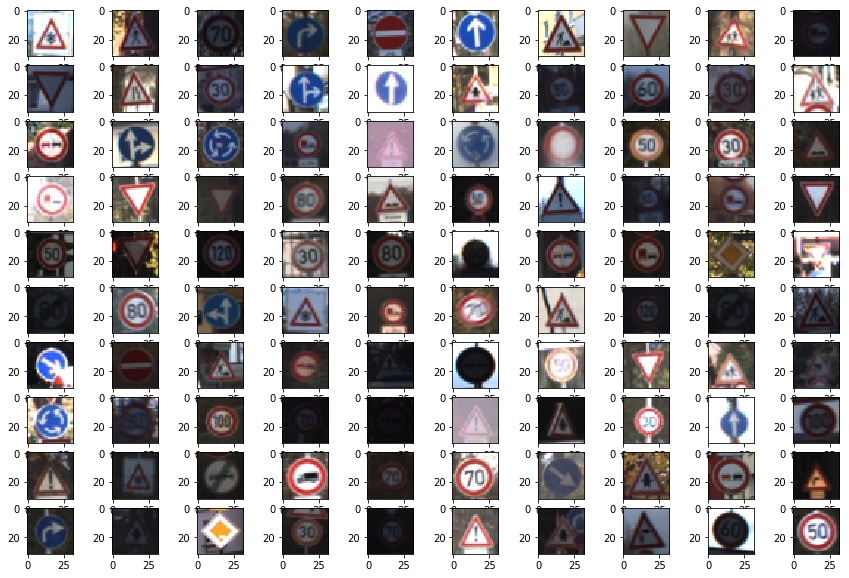

In [57]:
plt.figure(figsize=(15, 10))
random_range = [ii for ii in range(len(X_train))]
random.shuffle(random_range)
for ii in range(10*10):
    plt.subplot(10, 10, ii+1)
    plt.imshow(X_train[random_range[ii], :, :])

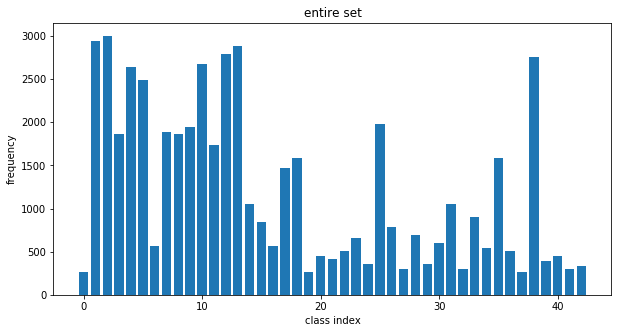

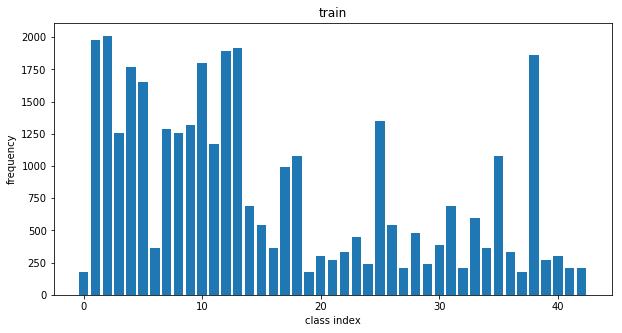

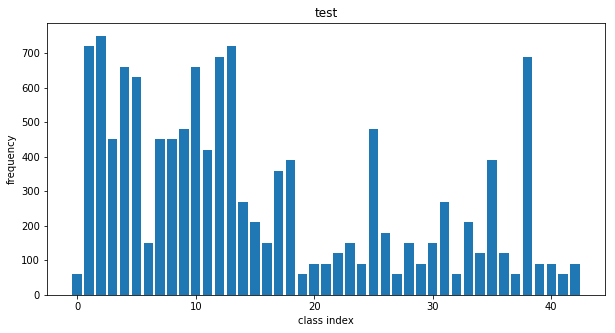

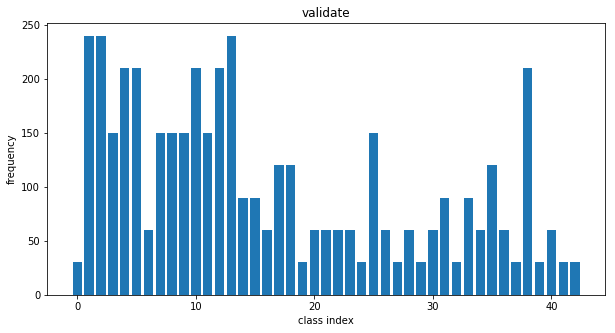

In [58]:
plt.figure(figsize=(10, 5))
freq = [0]*n_classes
for cls in np.hstack((y_test, y_valid, y_train)):
    freq[cls] += 1
plt.bar(range(len(freq)), freq)
plt.title('entire set')
plt.xlabel('class index')
plt.ylabel('frequency')

plt.figure(figsize=(10, 5))
freq = [0]*n_classes
for cls in y_train:
    freq[cls] += 1
plt.bar(range(len(freq)), freq)
plt.title('train')
plt.xlabel('class index')
plt.ylabel('frequency')

plt.figure(figsize=(10, 5))
freq = [0]*n_classes
for cls in y_test:
    freq[cls] += 1
plt.bar(range(len(freq)), freq)
plt.title('test')
plt.xlabel('class index')
plt.ylabel('frequency')

plt.figure(figsize=(10, 5))
freq = [0]*n_classes
for cls in y_valid:
    freq[cls] += 1
plt.bar(range(len(freq)), freq)
plt.title('validate')
plt.xlabel('class index')
plt.ylabel('frequency')

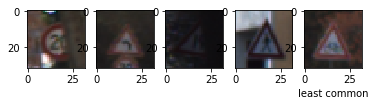

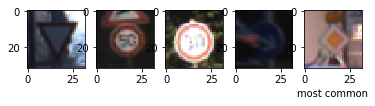

In [59]:
sorted_classes = sorted([ii for ii in range(43)], key=lambda x: freq[x])
images = []
for cls in sorted_classes[0:5]:
    for img, label in zip(X_valid, y_valid):
        if label == cls:
            images.append(img)
            break
for ii in range(5):
    plt.subplot(1, 5, ii+1)
    plt.imshow(images[ii])
plt.xlabel('least common')

plt.figure()
images = []
sorted_classes.reverse()
for cls in sorted_classes[0:5]:
    for img, label in zip(X_valid, y_valid):
        if label == cls:
            images.append(img)
            break
for ii in range(5):
    plt.subplot(1, 5, ii+1)
    plt.imshow(images[ii])
plt.xlabel('most common')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [60]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_train = (X_train.astype(np.float32) - 128)/128.0
X_test = (X_test.astype(np.float32) - 128)/128.0
X_valid = (X_valid.astype(np.float32) - 128)/128.0

X_train = np.mean(X_train, 3)
X_test = np.mean(X_test, 3)
X_valid = np.mean(X_valid, 3)

### Model Architecture

In [61]:
from tensorflow.contrib.layers import flatten

def LeNet(x, keep_prob):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    sc = 2
    
    c1depth = 6*sc
    c2depth = 16*sc
    fc1depth = 120*sc
    fc2depth = 84*sc
    numlabels = 43
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 1, c1depth], mean=mu, stddev=sigma), name='wc1'),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, c1depth, c2depth], mean=mu, stddev=sigma), name='wc2'),
        'wfc1': tf.Variable(tf.truncated_normal([5*5*c2depth, fc1depth])),
        'wfc2': tf.Variable(tf.truncated_normal([fc1depth, fc2depth])),
        'wfc3': tf.Variable(tf.truncated_normal([fc2depth, numlabels]))
    }
    biases = {
        'bc1': tf.Variable(tf.zeros([c1depth])),
        'bc2': tf.Variable(tf.zeros([c2depth])),
        'bfc1': tf.Variable(tf.zeros([fc1depth])),
        'bfc2': tf.Variable(tf.zeros([fc2depth])),
        'bfc3': tf.Variable(tf.zeros([numlabels]))
    }
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    print("input was {0}".format(x.get_shape()))
    print("wc1 was {0}".format(weights['wc1'].get_shape()))
    conv1 = tf.nn.conv2d(x, weights['wc1'], [1, 1, 1, 1], 'VALID')
    print("prebias conv1 {0}".format(conv1.get_shape()))
    conv1 = tf.nn.bias_add(conv1, biases['bc1'])
    print("postbias conv1 {0}".format(conv1.get_shape()))

    # TODO: Activation.
    conv1_activation = tf.nn.relu(conv1)
    print("actiavted conv1 {0}".format(conv1_activation.get_shape()))

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = tf.nn.max_pool(conv1_activation, [1, 2, 2, 1], [1,2,2,1], 'VALID')
    print("pool1 {0}".format(pool1.get_shape()))

    # TODO: Layer 2: Convolutional. Output = 10x10x1000.
    conv2 = tf.nn.conv2d(pool1, weights['wc2'], [1, 1, 1, 1], 'VALID')
    conv2 = tf.nn.bias_add(conv2, biases['bc2'])
    
    # TODO: Activation.
    conv2_activation = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x1000. Output = 5x5x1000.
    pool2 = tf.nn.max_pool(conv2_activation, [1, 2, 2, 1], [1,2,2,1], 'VALID')

    # TODO: Flatten. Input = 3x3x16. Output = 144.
    flattened = flatten(pool2)
    
    out = tf.nn.dropout(flattened, keep_prob)
    
    for i in range(3):
        num = str(i+1)
        weight = weights['wfc'+num]
        bias = biases['bfc'+num]
        out = tf.matmul(out, weight) + bias
        if i < 2:
            out = tf.nn.relu(out)
   
    logits = out
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [66]:
### Train your model here.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)

one_hot_y = tf.one_hot(y, 43)
### Calculate and report the accuracy on the training and validation set.
rate = 0.0005

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

prediction = tf.argmax(logits, 1)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

input was (?, 32, 32, 1)
wc1 was (5, 5, 1, 12)
prebias conv1 (?, 28, 28, 12)
postbias conv1 (?, 28, 28, 12)
actiavted conv1 (?, 28, 28, 12)
pool1 (?, 14, 14, 12)


In [67]:
EPOCHS = 500
BATCH_SIZE = 128
keep_probability = 0.5

from sklearn.utils import shuffle
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: np.expand_dims(batch_x, 3), y: batch_y, keep_prob: keep_probability})
        
        train_accuracy = evaluate(np.expand_dims(X_train, 3), y_train)    
        validation_accuracy = evaluate(np.expand_dims(X_valid, 3), y_valid)
        test_accuracy = evaluate(np.expand_dims(X_test, 3), y_test)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.053
Validation Accuracy = 0.057
Test Accuracy = 0.049

EPOCH 2 ...
Training Accuracy = 0.057
Validation Accuracy = 0.059
Test Accuracy = 0.059

EPOCH 3 ...
Training Accuracy = 0.055
Validation Accuracy = 0.057
Test Accuracy = 0.052

EPOCH 4 ...
Training Accuracy = 0.058
Validation Accuracy = 0.057
Test Accuracy = 0.058

EPOCH 5 ...
Training Accuracy = 0.056
Validation Accuracy = 0.054
Test Accuracy = 0.054

EPOCH 6 ...
Training Accuracy = 0.056
Validation Accuracy = 0.048
Test Accuracy = 0.057

EPOCH 7 ...
Training Accuracy = 0.056
Validation Accuracy = 0.055
Test Accuracy = 0.055

EPOCH 8 ...
Training Accuracy = 0.057
Validation Accuracy = 0.047
Test Accuracy = 0.059

EPOCH 9 ...
Training Accuracy = 0.056
Validation Accuracy = 0.055
Test Accuracy = 0.056

EPOCH 10 ...
Training Accuracy = 0.063
Validation Accuracy = 0.056
Test Accuracy = 0.065

EPOCH 11 ...
Training Accuracy = 0.070
Validation Accuracy = 0.059
Test Accuracy = 0.071

EPOCH 

EPOCH 92 ...
Training Accuracy = 0.943
Validation Accuracy = 0.890
Test Accuracy = 0.852

EPOCH 93 ...
Training Accuracy = 0.944
Validation Accuracy = 0.885
Test Accuracy = 0.861

EPOCH 94 ...
Training Accuracy = 0.948
Validation Accuracy = 0.896
Test Accuracy = 0.866

EPOCH 95 ...
Training Accuracy = 0.952
Validation Accuracy = 0.896
Test Accuracy = 0.870

EPOCH 96 ...
Training Accuracy = 0.948
Validation Accuracy = 0.890
Test Accuracy = 0.863

EPOCH 97 ...
Training Accuracy = 0.953
Validation Accuracy = 0.900
Test Accuracy = 0.866

EPOCH 98 ...
Training Accuracy = 0.955
Validation Accuracy = 0.903
Test Accuracy = 0.871

EPOCH 99 ...
Training Accuracy = 0.954
Validation Accuracy = 0.900
Test Accuracy = 0.873

EPOCH 100 ...
Training Accuracy = 0.949
Validation Accuracy = 0.896
Test Accuracy = 0.862

EPOCH 101 ...
Training Accuracy = 0.954
Validation Accuracy = 0.900
Test Accuracy = 0.877

EPOCH 102 ...
Training Accuracy = 0.958
Validation Accuracy = 0.911
Test Accuracy = 0.873

EPOCH 1

EPOCH 183 ...
Training Accuracy = 0.981
Validation Accuracy = 0.934
Test Accuracy = 0.909

EPOCH 184 ...
Training Accuracy = 0.987
Validation Accuracy = 0.937
Test Accuracy = 0.917

EPOCH 185 ...
Training Accuracy = 0.979
Validation Accuracy = 0.938
Test Accuracy = 0.913

EPOCH 186 ...
Training Accuracy = 0.986
Validation Accuracy = 0.935
Test Accuracy = 0.917

EPOCH 187 ...
Training Accuracy = 0.983
Validation Accuracy = 0.935
Test Accuracy = 0.912

EPOCH 188 ...
Training Accuracy = 0.983
Validation Accuracy = 0.932
Test Accuracy = 0.919

EPOCH 189 ...
Training Accuracy = 0.984
Validation Accuracy = 0.934
Test Accuracy = 0.914

EPOCH 190 ...
Training Accuracy = 0.980
Validation Accuracy = 0.929
Test Accuracy = 0.907

EPOCH 191 ...
Training Accuracy = 0.981
Validation Accuracy = 0.934
Test Accuracy = 0.916

EPOCH 192 ...
Training Accuracy = 0.979
Validation Accuracy = 0.929
Test Accuracy = 0.916

EPOCH 193 ...
Training Accuracy = 0.988
Validation Accuracy = 0.931
Test Accuracy = 0.919


EPOCH 274 ...
Training Accuracy = 0.992
Validation Accuracy = 0.951
Test Accuracy = 0.933

EPOCH 275 ...
Training Accuracy = 0.993
Validation Accuracy = 0.952
Test Accuracy = 0.932

EPOCH 276 ...
Training Accuracy = 0.993
Validation Accuracy = 0.951
Test Accuracy = 0.938

EPOCH 277 ...
Training Accuracy = 0.991
Validation Accuracy = 0.947
Test Accuracy = 0.927

EPOCH 278 ...
Training Accuracy = 0.989
Validation Accuracy = 0.941
Test Accuracy = 0.918

EPOCH 279 ...
Training Accuracy = 0.991
Validation Accuracy = 0.950
Test Accuracy = 0.928

EPOCH 280 ...
Training Accuracy = 0.992
Validation Accuracy = 0.937
Test Accuracy = 0.925

EPOCH 281 ...
Training Accuracy = 0.990
Validation Accuracy = 0.951
Test Accuracy = 0.925

EPOCH 282 ...
Training Accuracy = 0.992
Validation Accuracy = 0.956
Test Accuracy = 0.927

EPOCH 283 ...
Training Accuracy = 0.994
Validation Accuracy = 0.951
Test Accuracy = 0.930

EPOCH 284 ...
Training Accuracy = 0.990
Validation Accuracy = 0.945
Test Accuracy = 0.925


EPOCH 365 ...
Training Accuracy = 0.995
Validation Accuracy = 0.949
Test Accuracy = 0.937

EPOCH 366 ...
Training Accuracy = 0.995
Validation Accuracy = 0.948
Test Accuracy = 0.930

EPOCH 367 ...
Training Accuracy = 0.996
Validation Accuracy = 0.954
Test Accuracy = 0.936

EPOCH 368 ...
Training Accuracy = 0.996
Validation Accuracy = 0.955
Test Accuracy = 0.938

EPOCH 369 ...
Training Accuracy = 0.996
Validation Accuracy = 0.965
Test Accuracy = 0.938

EPOCH 370 ...
Training Accuracy = 0.996
Validation Accuracy = 0.959
Test Accuracy = 0.935

EPOCH 371 ...
Training Accuracy = 0.996
Validation Accuracy = 0.948
Test Accuracy = 0.934

EPOCH 372 ...
Training Accuracy = 0.996
Validation Accuracy = 0.956
Test Accuracy = 0.941

EPOCH 373 ...
Training Accuracy = 0.996
Validation Accuracy = 0.958
Test Accuracy = 0.937

EPOCH 374 ...
Training Accuracy = 0.996
Validation Accuracy = 0.959
Test Accuracy = 0.937

EPOCH 375 ...
Training Accuracy = 0.997
Validation Accuracy = 0.960
Test Accuracy = 0.942


EPOCH 456 ...
Training Accuracy = 0.992
Validation Accuracy = 0.952
Test Accuracy = 0.929

EPOCH 457 ...
Training Accuracy = 0.996
Validation Accuracy = 0.952
Test Accuracy = 0.935

EPOCH 458 ...
Training Accuracy = 0.996
Validation Accuracy = 0.957
Test Accuracy = 0.942

EPOCH 459 ...
Training Accuracy = 0.997
Validation Accuracy = 0.958
Test Accuracy = 0.941

EPOCH 460 ...
Training Accuracy = 0.997
Validation Accuracy = 0.955
Test Accuracy = 0.940

EPOCH 461 ...
Training Accuracy = 0.997
Validation Accuracy = 0.955
Test Accuracy = 0.940

EPOCH 462 ...
Training Accuracy = 0.998
Validation Accuracy = 0.963
Test Accuracy = 0.936

EPOCH 463 ...
Training Accuracy = 0.995
Validation Accuracy = 0.953
Test Accuracy = 0.928

EPOCH 464 ...
Training Accuracy = 0.997
Validation Accuracy = 0.961
Test Accuracy = 0.937

EPOCH 465 ...
Training Accuracy = 0.995
Validation Accuracy = 0.952
Test Accuracy = 0.939

EPOCH 466 ...
Training Accuracy = 0.994
Validation Accuracy = 0.954
Test Accuracy = 0.937


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

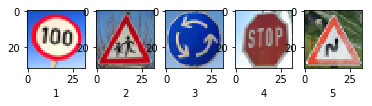

In [92]:
ims = [imread('images/{}.png'.format(ii)) for ii in [1, 2, 3, 4, 5]]
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(ims[i])
    plt.xlabel(str(i+1))

### Predict the Sign Type for Each Image

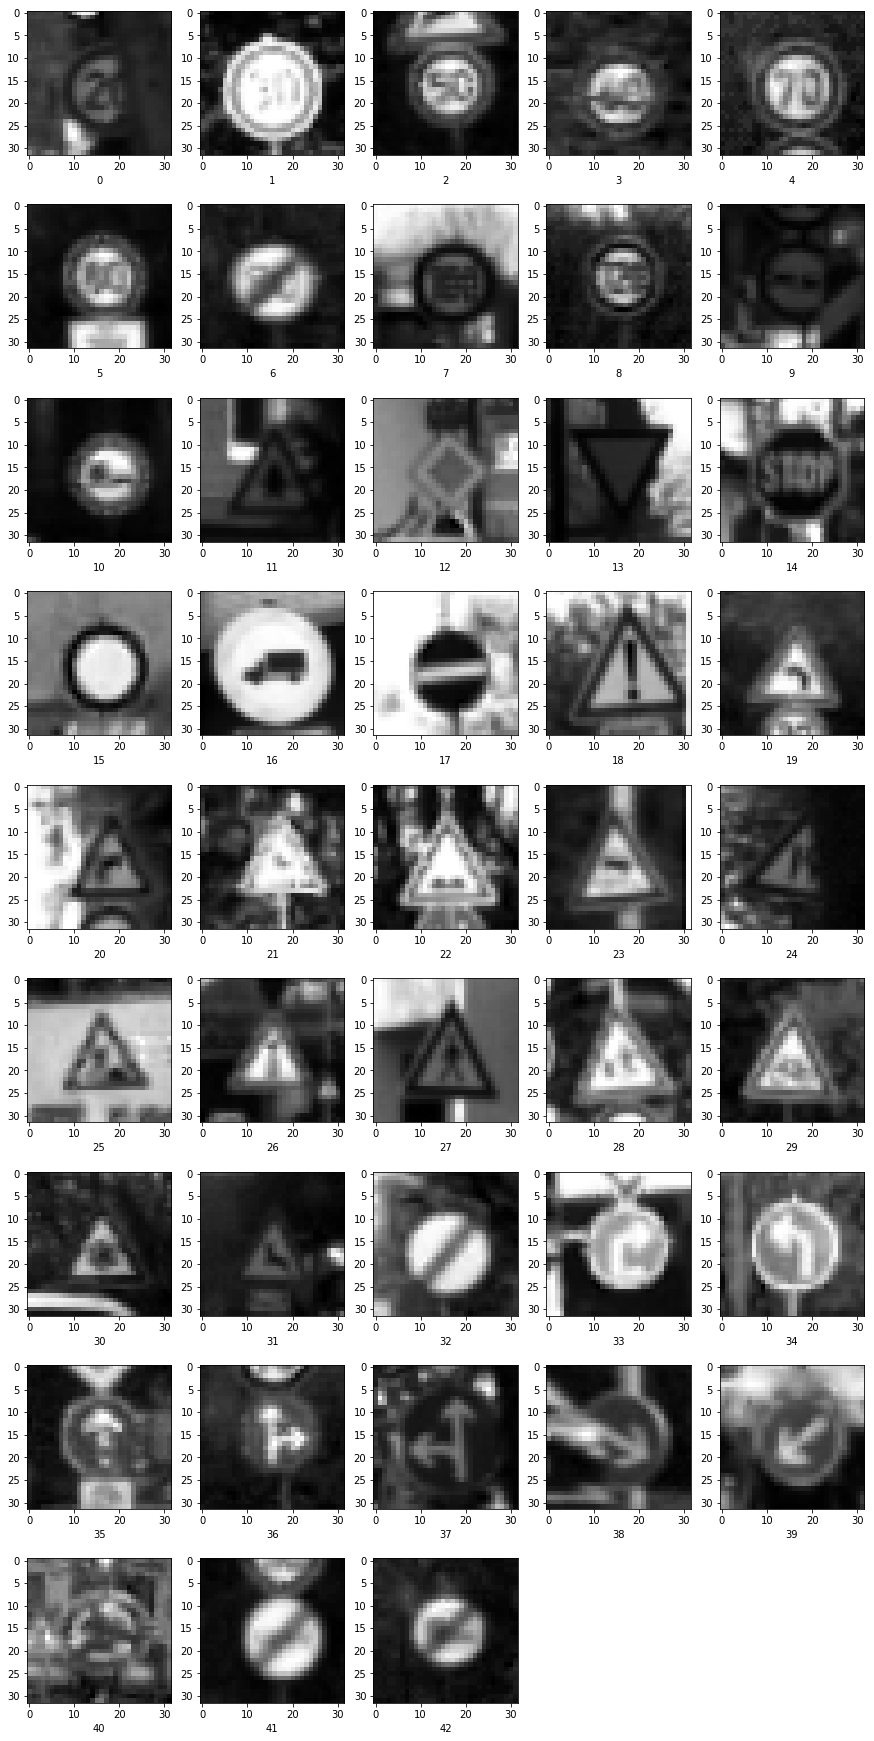

In [110]:
sorted_classes = sorted([ii for ii in range(43)], key=lambda x: freq[x])
plt.figure(figsize=(15, 35))
images = []
for cls in range(43):
    for img, label in zip(X_valid, y_valid):
        if label == cls:
            images.append(img)
            break
for ii in range(43):
    plt.subplot(10, 5, ii+1)
    plt.imshow(images[ii], 'gray')
    plt.xlabel(str(ii))

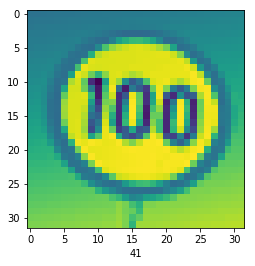

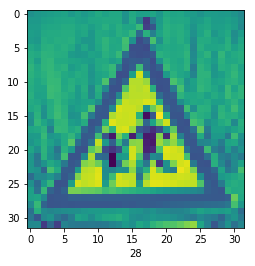

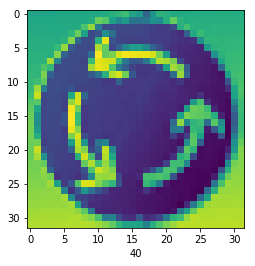

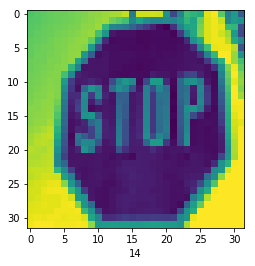

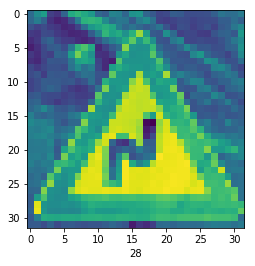

In [165]:
topks = []
for im in ims:
    with tf.Session() as sess:
        imin = im.copy().astype(np.float64)
        imin = np.mean(imin, 2)
        imin = imin/128 - 1.0
        plt.figure()
        plt.imshow(imin)
        saver.restore(sess, "./lenet")
        res = sess.run(tf.nn.softmax(logits), feed_dict={x: np.expand_dims(np.expand_dims(imin, axis=0), axis=3), keep_prob: 1})
        topk = sess.run(tf.nn.top_k(tf.constant(res), k=5))
        topks.append(topk)
        plt.xlabel(np.argmax(res))

### Analyze Performance

In [168]:
performance = 3.0/5
correct = [7, 28, 40, 14, 21]

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [169]:
import pandas as pd
snames = pd.read_csv('signnames.csv')

In [170]:
snames.SignName[0]

'Speed limit (20km/h)'

Correct Label: Speed limit (100km/h)
Label: End of no passing, Prob: 0.981311023235321
Label: End of no passing by vehicles over 3.5 metric tons, Prob: 0.01642354018986225
Label: No passing for vehicles over 3.5 metric tons, Prob: 0.0011585787869989872
Label: End of all speed and passing limits, Prob: 0.000991170178167522
Label: End of speed limit (80km/h), Prob: 5.963803778286092e-05

Correct Label: Children crossing
Label: Children crossing, Prob: 0.9999712705612183
Label: Right-of-way at the next intersection, Prob: 2.8693348212982528e-05
Label: Beware of ice/snow, Prob: 1.878890643070008e-08
Label: Bicycles crossing, Prob: 1.8967494241906024e-09
Label: Dangerous curve to the right, Prob: 1.7199488500097004e-09

Correct Label: Roundabout mandatory
Label: Roundabout mandatory, Prob: 0.9646259546279907
Label: Priority road, Prob: 0.034896258264780045
Label: End of no passing by vehicles over 3.5 metric tons, Prob: 0.0004639375547412783
Label: Go straight or right, Prob: 6.921389740455

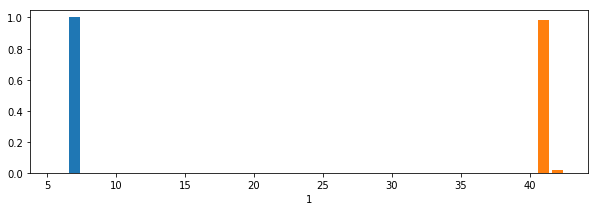

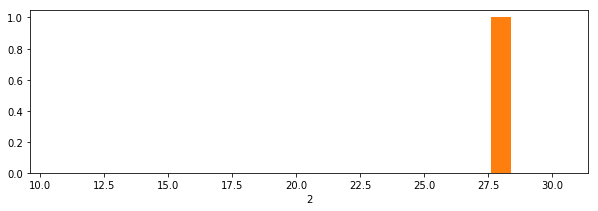

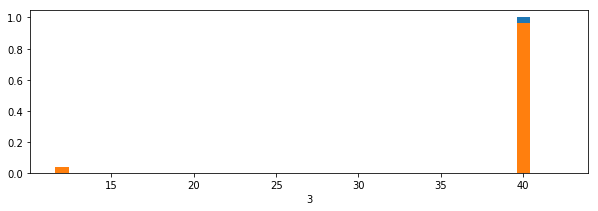

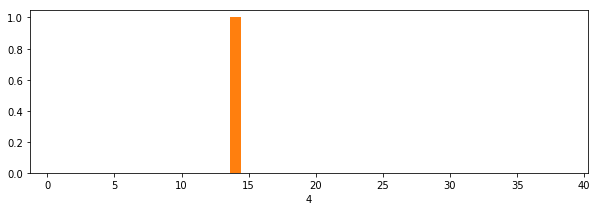

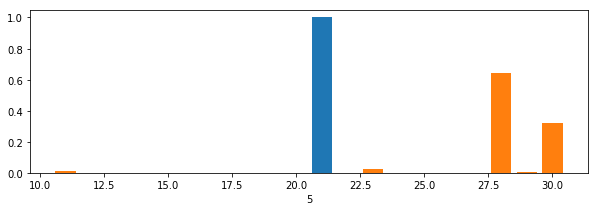

In [171]:
for ii in range(5):
    plt.figure(figsize=(10, 3))
    plt.bar(correct[ii], 1.0)
    plt.bar(topks[ii].indices[0], topks[ii].values[0])
    print("Correct Label: {}".format(snames.SignName[correct[ii]]))
    for index, prob in zip(topks[ii].indices[0], topks[ii].values[0]):
        print("Label: {0}, Prob: {1}".format(snames.SignName[index], prob))
    print('')
    plt.xlabel(ii+1)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [208]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    image_input = image_input.copy().astype(np.float64)/128 - 1.0
    image_input = np.mean(image_input, 2)
    image_input = np.expand_dims(np.expand_dims(image_input, axis=0), axis=3)
    print(image_input.shape)
    activation = sess.run(sess.graph.get_operation_by_name('Relu'), feed_dict={x : image_input, keep_prob: 1.0})
    print(activation.shape)
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[:,:,0, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[:,:,0, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[:,:,0, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[:,:,0, featuremap], interpolation="nearest", cmap="gray")

In [209]:
topks = []
for im in ims[0:1]:
    with tf.Session() as sess:
        saver.restore(sess, "./lenet")
        outputFeatureMap(im, 'wc1')

(1, 32, 32, 1)


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-50-0740bd0beacc>", line 2, in <module>
    x = tf.placeholder(tf.float32, (None, 32, 32, 1))
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1587, in placeholder
    name=name)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2043, in _placeholder
    name=name)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/jari/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]
